In [1]:
# Importo las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as missin
from bs4 import BeautifulSoup
import requests
%matplotlib inline
sns.set_style('whitegrid')
def comas(columna):
    '''
    Función para reemplazar las comas de los números por puntos y pasarlo a númerico
    '''
    return [float(i.replace(',','.')) for i in columna]

In [2]:
#Cargo el CSV
df = pd.read_csv('countries.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
# Vemos algo de información sobre el dataset.
print(df.shape)
df.info()

(227, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                         

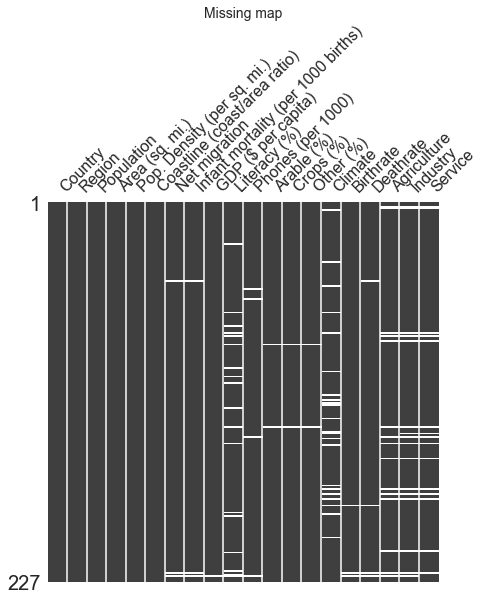

In [4]:
# Pinto los nulos por columna.
fig, ax = plt.subplots(figsize=(7,7))
missin.matrix(df,ax=ax,sparkline=False)
plt.title('Missing map',fontsize=14)
plt.savefig('missing.png')

In [5]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

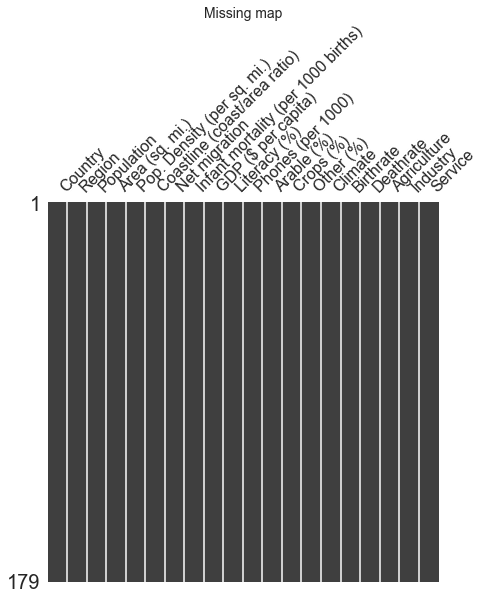

In [6]:
# Elimino las filas en las que se encuentre un nulo, ya que necesitamos la mayor cantidad de información completa.
# No tenemos muchos registros por lo que he decidido que los que tengamos tengan toda la información.
df.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(7,7))
missin.matrix(df,ax=ax,sparkline=False)
plt.title('Missing map',fontsize=14);
#Pinto de nuevo la matriz de nulos para comprobar que no queda ninguno.

In [7]:
# El número de registros completos que nos quedan
df.shape

(179, 20)

In [8]:
# Aplicamos la función que sustituye las columnas con comas por puntos y pasa sus registros a tipo númerico.

In [9]:
df['Pop. Density (per sq. mi.)'] = df['Pop. Density (per sq. mi.)'].apply(lambda x: float(x.replace(',','.')))

In [10]:
df[['Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)',
    'Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Climate','Birthrate',
   'Deathrate','Agriculture','Industry','Service']] = df[['Coastline (coast/area ratio)','Net migration',
                                                          'Infant mortality (per 1000 births)',
                                                          'Literacy (%)','Phones (per 1000)','Arable (%)',
                                                          'Crops (%)','Other (%)','Climate','Birthrate',
                                                          'Deathrate','Agriculture','Industry',
                                                          'Service']].apply(lambda x: comas(x))


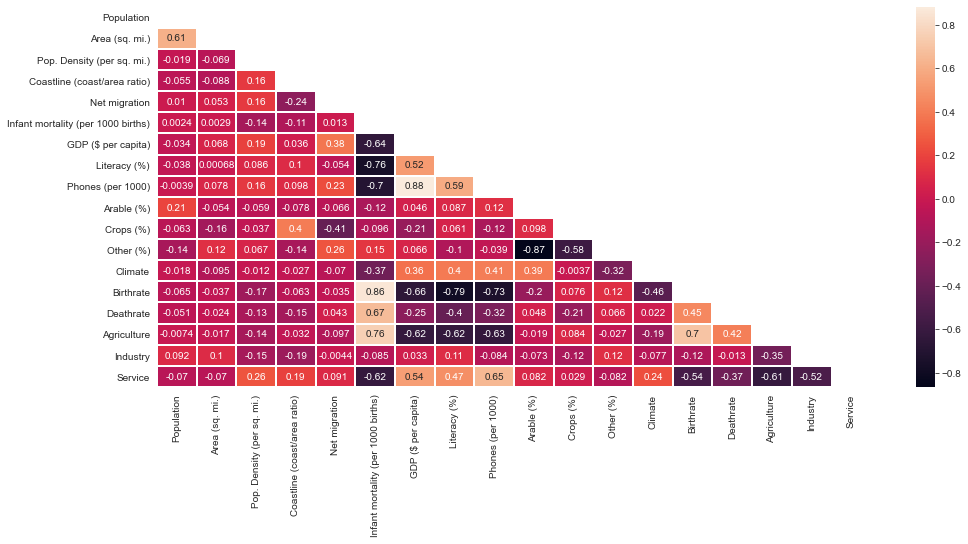

<Figure size 432x288 with 0 Axes>

In [11]:
# Matriz de correlación entre columnas.
plt.figure(figsize = (16, 7))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '0.2g', linewidths = 1)
plt.show()
plt.savefig('heatmap2.png')


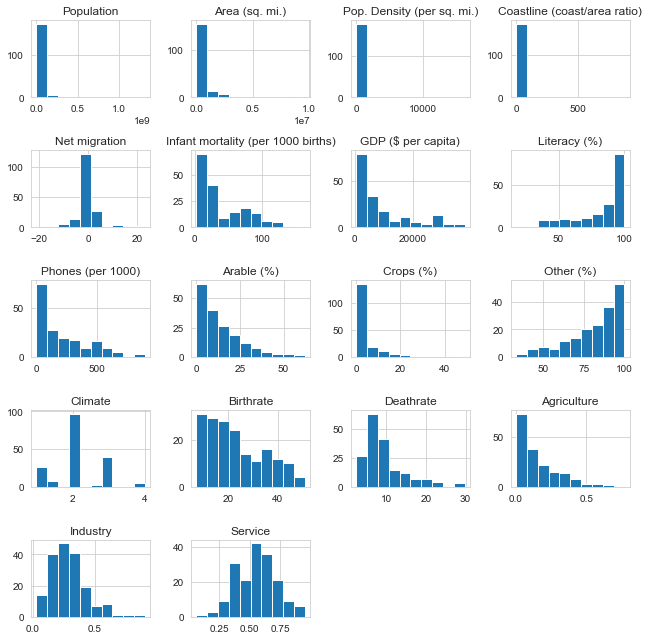

In [12]:
#Distribución de los datos.
df.hist(figsize=(9,9))
plt.tight_layout()
plt.savefig('distribution_features.png')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


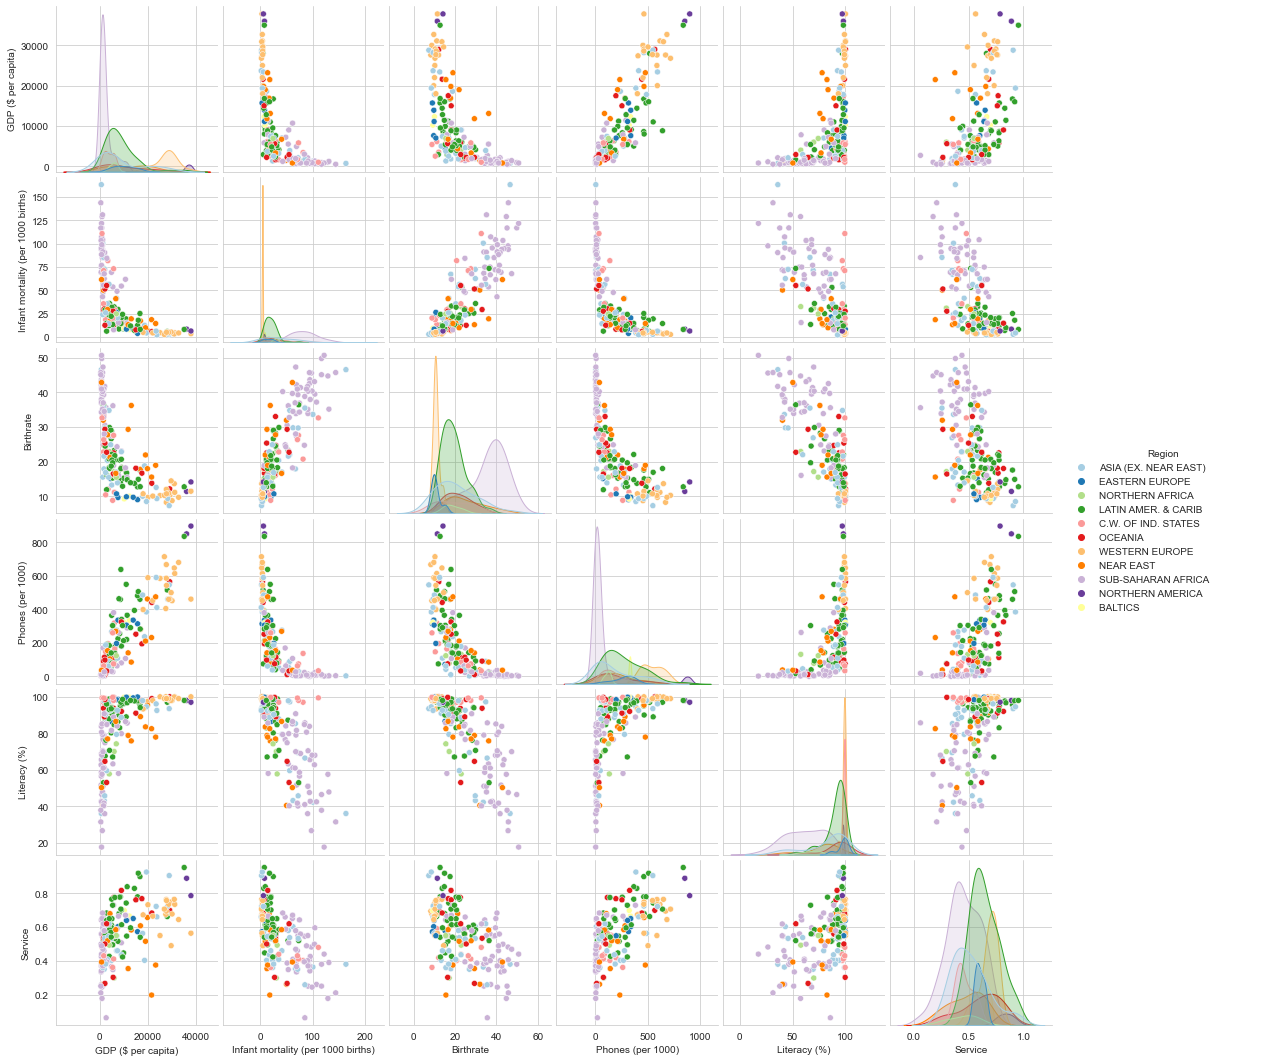

In [13]:
# Pairplot de las columnas por Región. La diagonal es un kde.
x = df.loc[:,["Region","GDP ($ per capita)","Infant mortality (per 1000 births)",
                "Birthrate","Phones (per 1000)","Literacy (%)","Service"]]
sns.pairplot(x, hue="Region",palette='Paired', diag_kind='kde')

plt.savefig('distribution_features_pairplot.png')


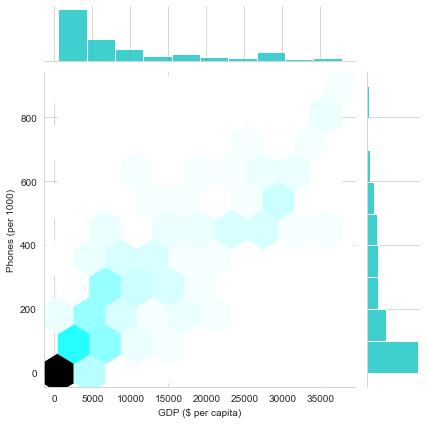

In [14]:
#Aparentemente existe una fuerte correlacion entre Dolares per capita y Phones (Per 100)
sns.jointplot(x='GDP ($ per capita)', y='Phones (per 1000)', kind='hex', data=df, color='c')
plt.savefig('jointplot-gdp_phones.png')

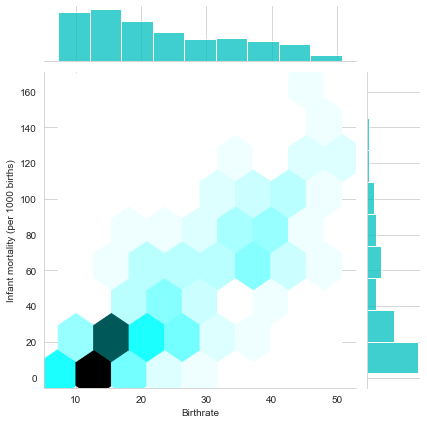

In [15]:
#Parece haber también una fuerte correlación entre birthrate e infant mortality
sns.jointplot(x='Birthrate', y='Infant mortality (per 1000 births)', kind='hex', data=df, color='c')
plt.savefig('jointplot-birthrate_infantmortality.png')

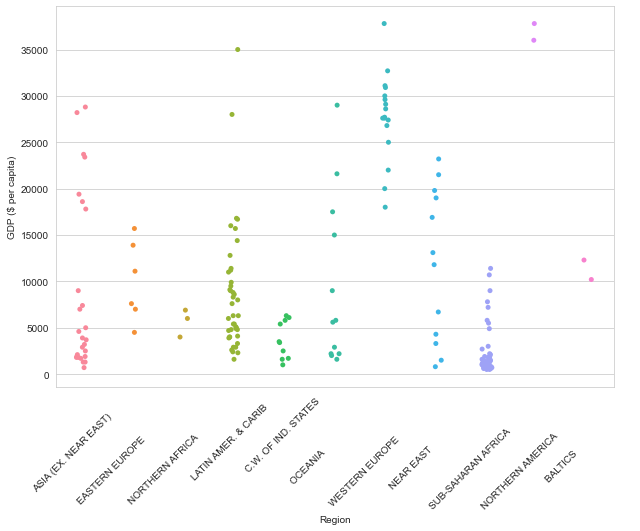

In [16]:
# Valores de Renta per Capita por Región.
plt.subplots(figsize=(10,7))
sns.stripplot(x='Region', y='GDP ($ per capita)', data=df)
plt.xticks(rotation=45);
plt.savefig('strip-gdpByRegion.png')

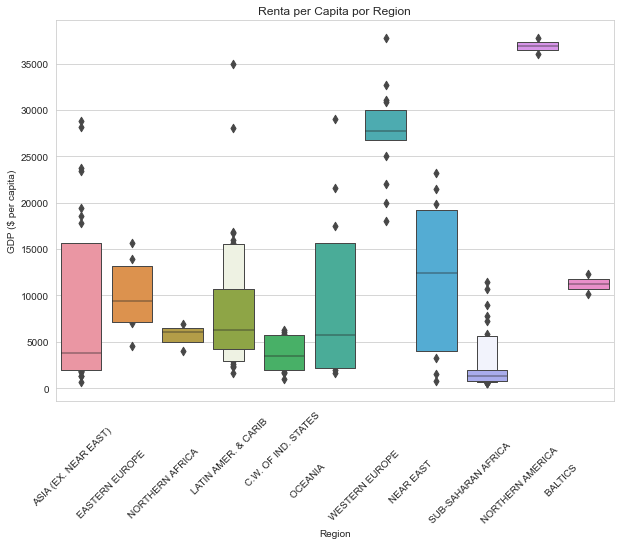

In [17]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=df, x='Region', y='GDP ($ per capita)')
plt.title('Renta per Capita por Region')
plt.xticks(rotation=45);
plt.savefig('boxplot-gdpByRegion.png')

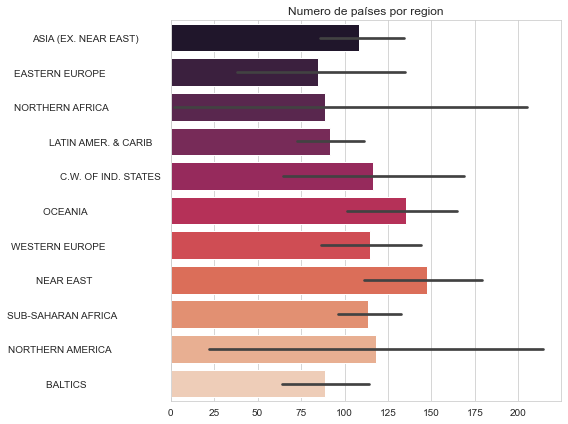

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x=df.Region.index, y=df.Region.values, palette='rocket', orient='h')  
plt.title('Numero de países por region', fontsize=12);
plt.savefig('num_paisesByRegion.png')

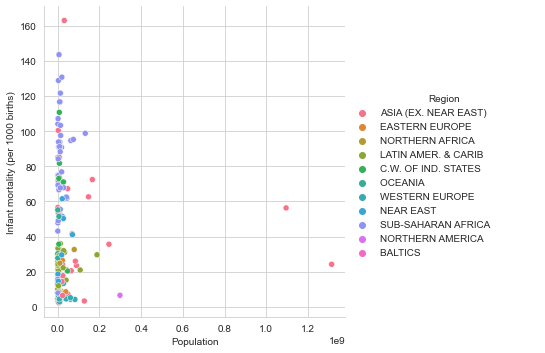

In [19]:
sns.relplot(data = df, x='Population',y='Infant mortality (per 1000 births)',
            hue='Region')
plt.savefig('Population_Infantmortality.png')

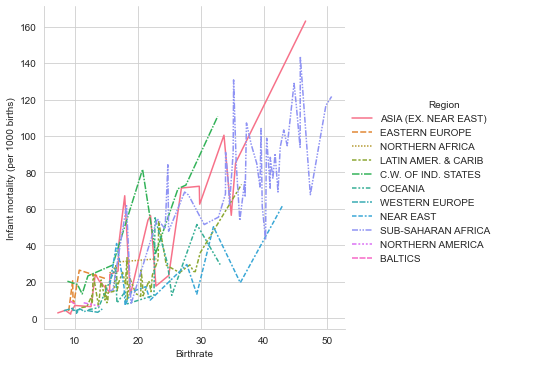

In [20]:
sns.relplot(x="Birthrate", y="Infant mortality (per 1000 births)", hue="Region", style = 'Region',
            kind="line", data=df)
plt.savefig('Birthrate-infantmortalityByRegion.png')

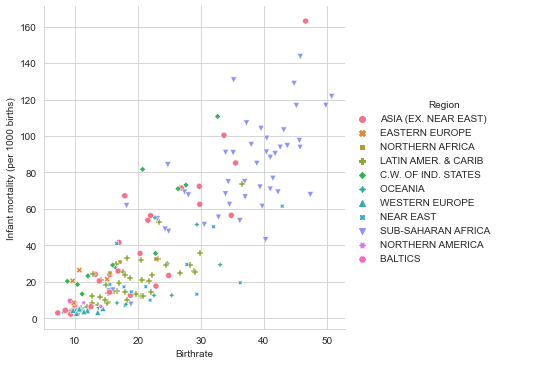

In [21]:
#Seguimos estudiando un poco mas con detalle las correlaciones mas significativas.
sns.relplot(x="Birthrate", y="Infant mortality (per 1000 births)", hue="Region", style = 'Region',
            kind="scatter", data=df)
plt.savefig('Birthrate-infantmortalityByRegion2.png')

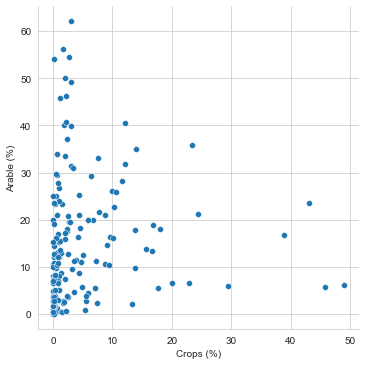

In [22]:
sns.relplot(x="Crops (%)", y="Arable (%)",
            kind="scatter", data=df);
plt.savefig('crops-arableByRegion.png')

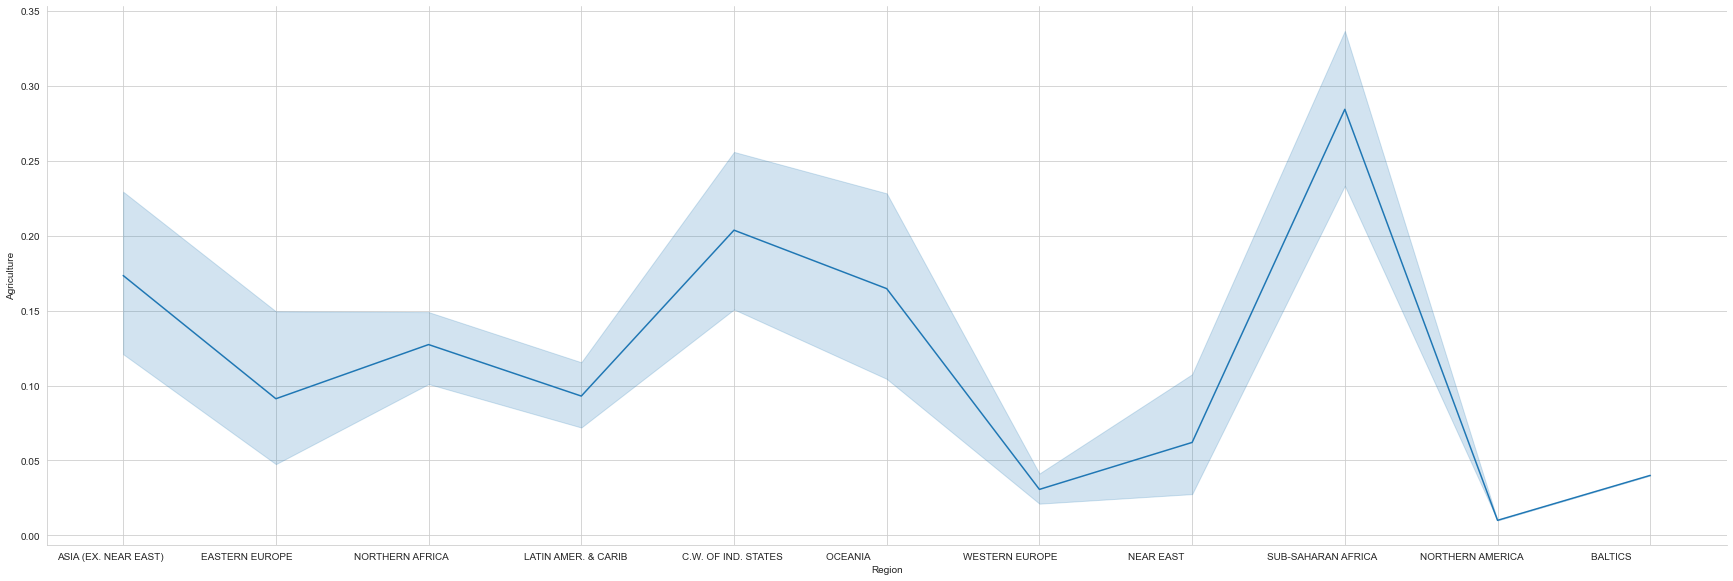

In [23]:
sns.relplot(x='Region',y='Agriculture',data=df,kind='line', sizes=(2,2), aspect= 3, height= 8)

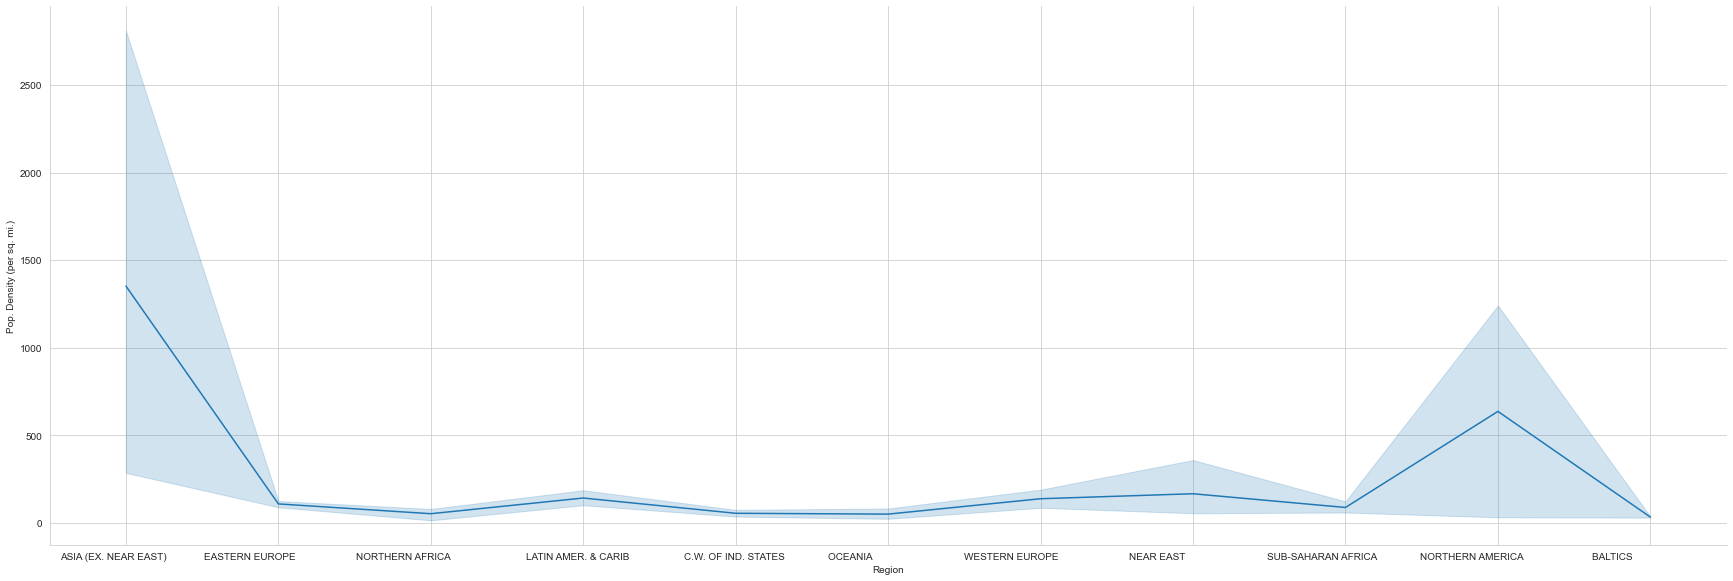

In [24]:
sns.relplot(x='Region',y='Pop. Density (per sq. mi.)',data=df,kind='line', sizes=(2,2), aspect= 3, height= 8)
plt.savefig('Pop_densityByRegion.png')

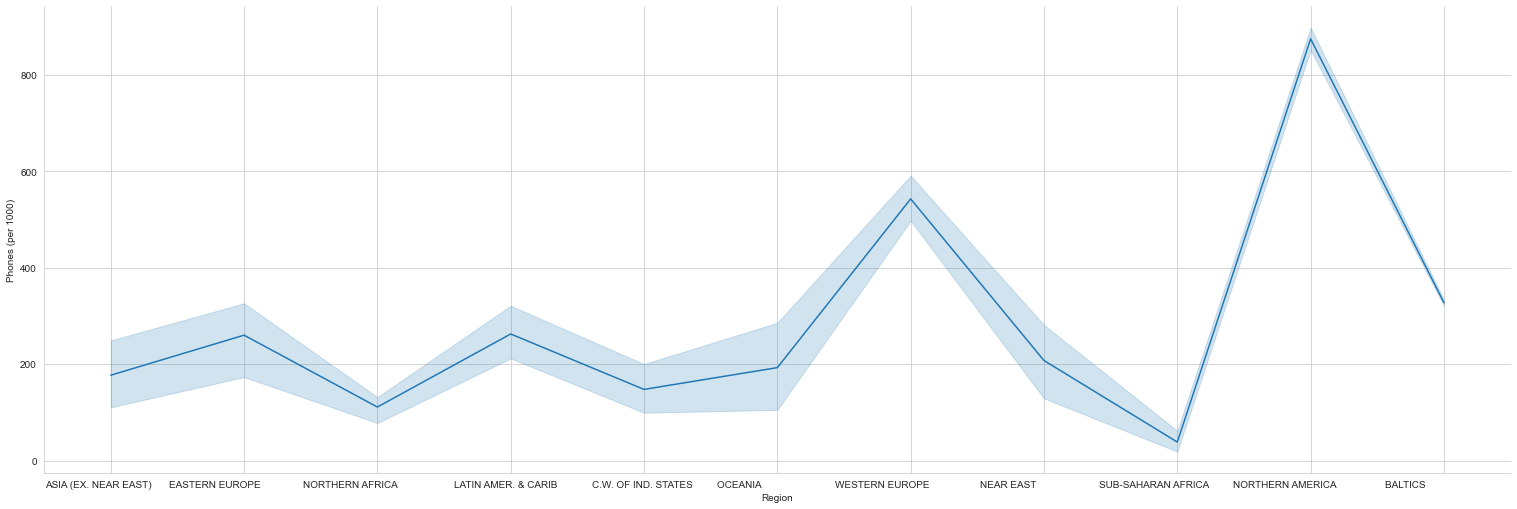

In [25]:
sns.relplot(x='Region',y='Phones (per 1000)',data=df,kind='line', sizes=(2,2), aspect= 3, height= 7)
plt.savefig('numberphonesbyregion.png')

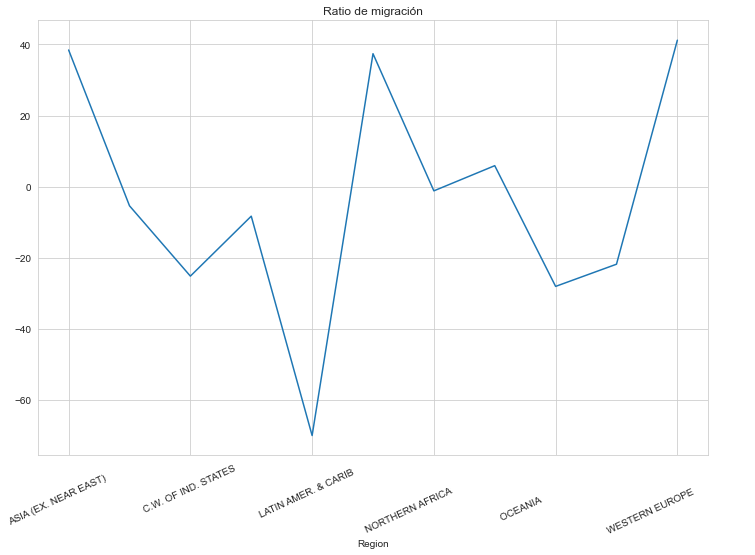

In [26]:
df.groupby('Region')['Net migration'].sum().plot(figsize=(12,8))
plt.xticks(rotation=25);
plt.title('Ratio de migración')
plt.savefig('ratio_migracion.png')

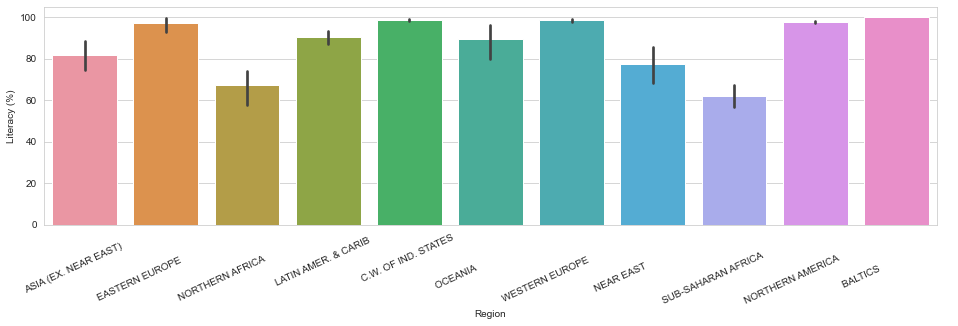

<Figure size 432x288 with 0 Axes>

In [27]:
# Porcentaje por región de alfabetización.
plt.figure(figsize = (16, 4))

sns.barplot(x = 'Region', y = 'Literacy (%)', data = df)
plt.xticks(rotation=25);
plt.show()
plt.savefig('alfabetizacionByRegion.png')

<Figure size 648x504 with 0 Axes>

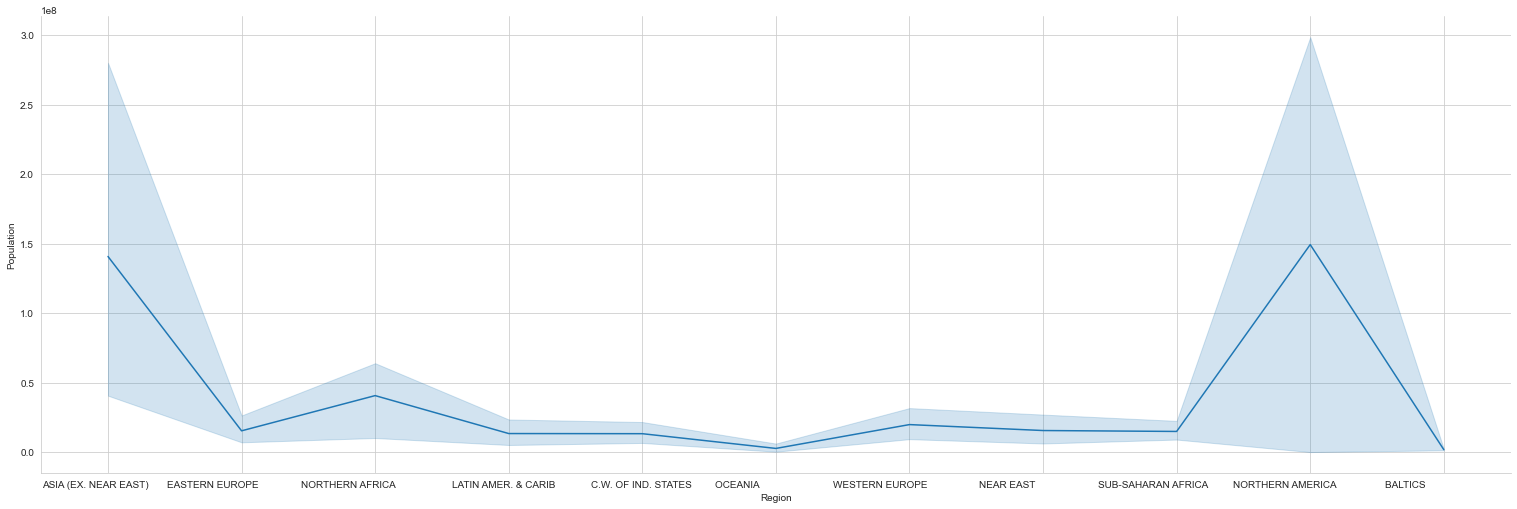

<Figure size 648x504 with 0 Axes>

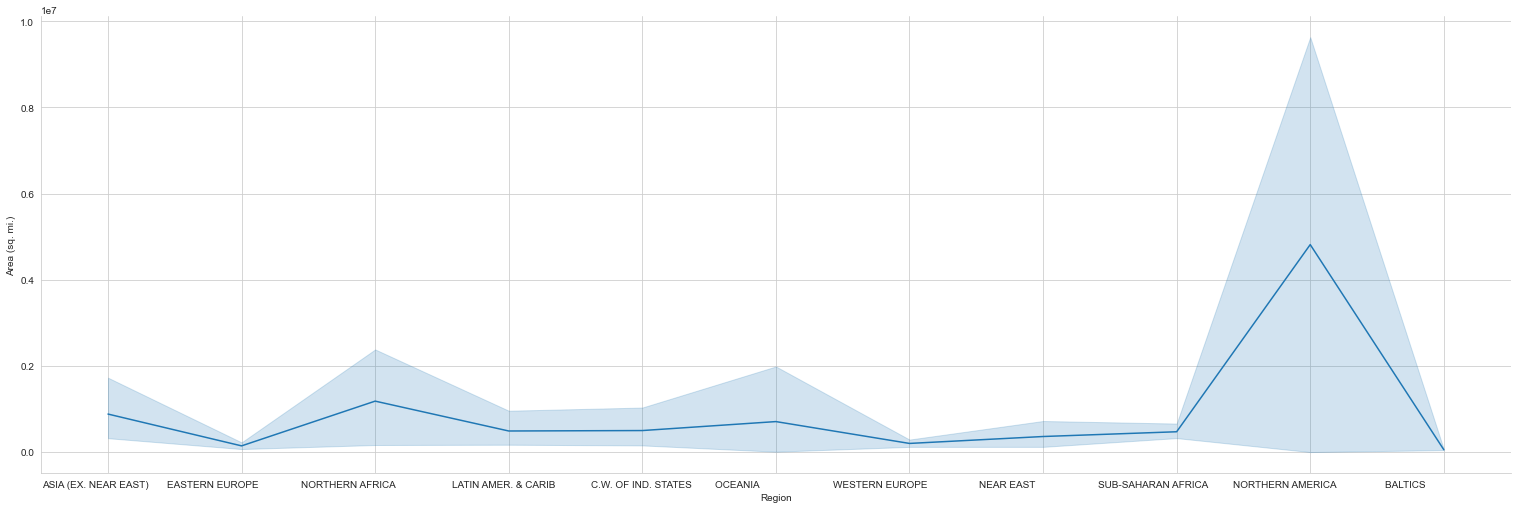

<Figure size 648x504 with 0 Axes>

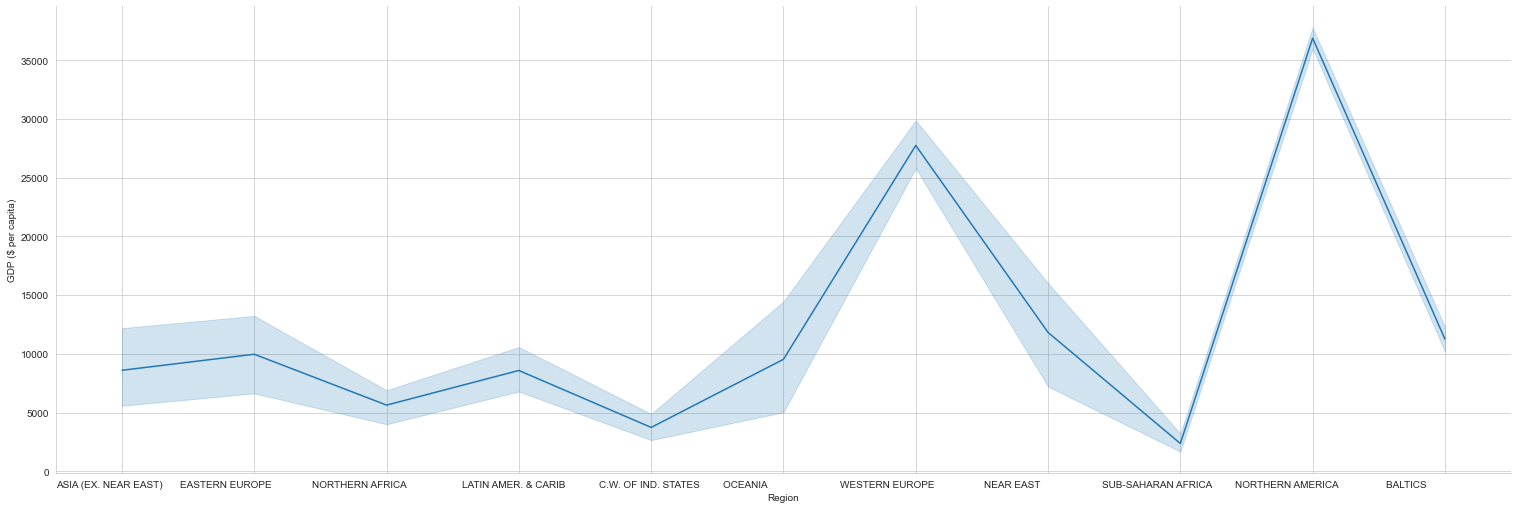

In [28]:
df_mean = df.groupby('Region')[['Population','Area (sq. mi.)',
                                'GDP ($ per capita)']].mean().reset_index(drop=False)
df_mean[['Population','Area (sq. mi.)',
         'GDP ($ per capita)']]=df_mean[['Population','Area (sq. mi.)',
                                         'GDP ($ per capita)']].applymap(lambda x: round(x,2))
df_mean[['Population']] = df_mean[['Population']].apply(lambda x: round(x/1000000,2))



for i in df_mean[['Population','Area (sq. mi.)','GDP ($ per capita)']]:
    plt.figure(figsize=(9,7))
    sns.relplot(x='Region',y=i,data=df, aspect=3, height=7, kind='line')
    


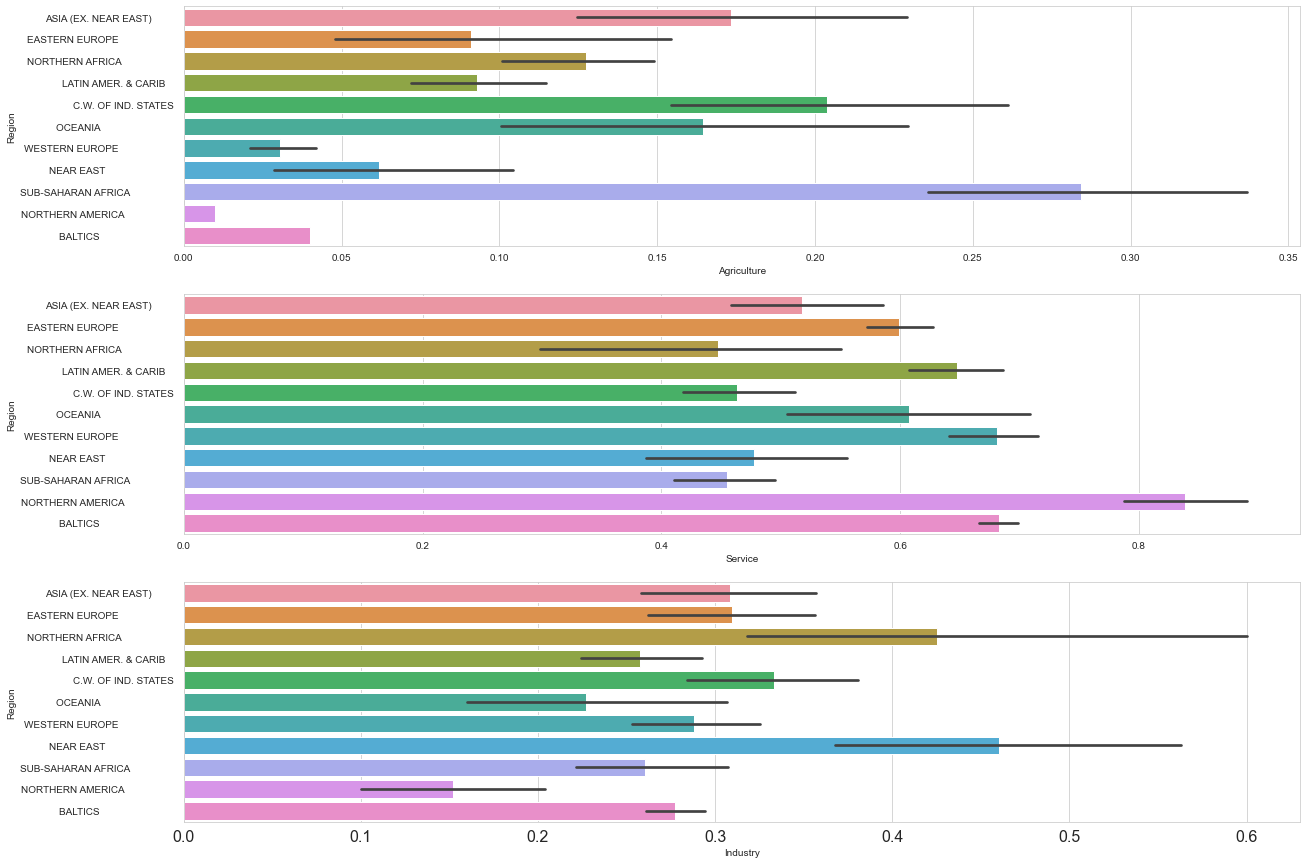

<Figure size 432x288 with 0 Axes>

In [29]:
# Sectores por región ('Agriculture', 'Industry', 'Services')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.barplot(data=df, x='Agriculture', y='Region', ax=ax1)
sns.barplot(data=df, x='Service', y='Region', ax=ax2)
sns.barplot(data=df, x='Industry', y='Region', ax=ax3)

plt.xticks(fontsize=16)
plt.show()
plt.savefig('sectoresByRegion.png')

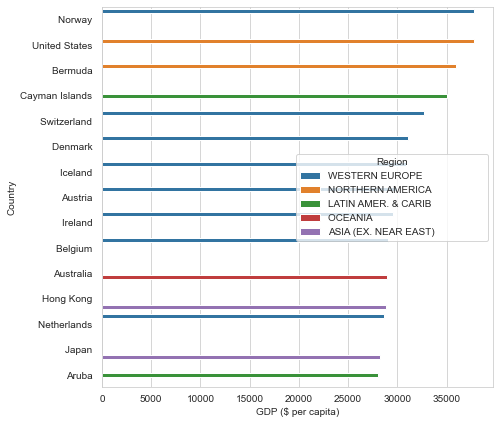

In [30]:
#Paises con mas renta per capita
capita_mas = df.nlargest(15,'GDP ($ per capita)')
plt.figure(figsize=(7,7))
sns.barplot(x=capita_mas['GDP ($ per capita)'], y=capita_mas['Country'], hue=capita_mas['Region'],
            errwidth=1, capsize=3)
plt.savefig('top_gdp.png')

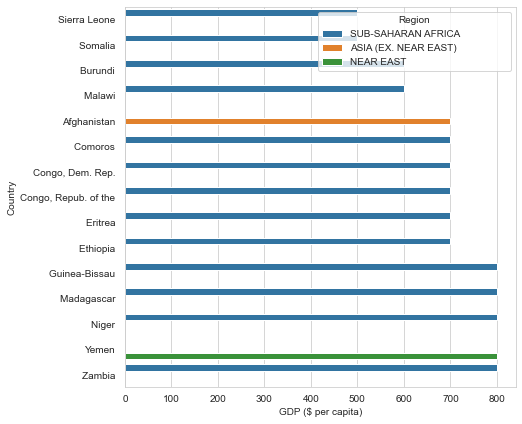

In [31]:
#Paises con menos renta per capita
capita_mas = df.nsmallest(15,'GDP ($ per capita)')
plt.figure(figsize=(7,7))
sns.barplot(x=capita_mas['GDP ($ per capita)'], y=capita_mas['Country'], hue=capita_mas['Region'],
            errwidth=0.4, capsize=3)
plt.savefig('less_gdp.png')

<AxesSubplot:xlabel='Population', ylabel='Count'>

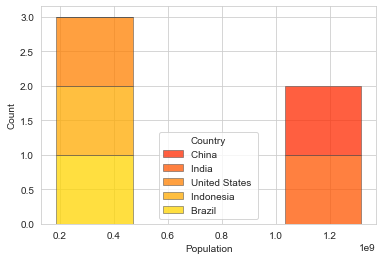

In [32]:
# Los 5 paises con mayor población
top_paises = df.nlargest(5,'Population')
sns.histplot(
    top_paises,
    x=top_paises['Population'], hue=top_paises["Country"],
    multiple="stack",
    palette="autumn",
    edgecolor=".3",
    linewidth=.5,
)

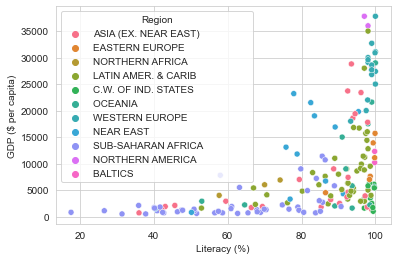

In [33]:
# Son las regiones con menos porcentaje de analfabetismo los más ricos (>GDP/cápita)? Existe alguna excepción?

sns.scatterplot(x='Literacy (%)',
          y='GDP ($ per capita)',
          hue='Region',
          data=df)
plt.savefig('LiteracyByRegion.png')

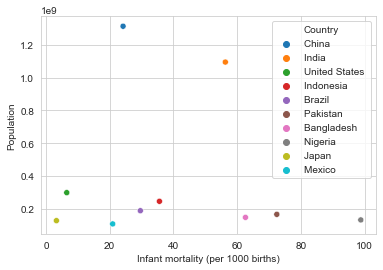

In [34]:
#China ha implantado ciertas políticas debido a sus problemas de sobrepoblación. 
#Actualmente, es similar a países europeos/USA en cuestiones como mortalidad infantil?
china = df.nlargest(10,'Population')

sns.scatterplot(x='Infant mortality (per 1000 births)',
          y='Population',
          hue='Country',
          data=china, legend='full'
           )
plt.savefig('top_population-infant.png')


In [35]:
china2 = china.groupby('Infant mortality (per 1000 births)')[['Country']].sum()
china2

,Country
Infant mortality (per 1000 births),
3.26,Japan
6.50,United States
20.91,Mexico
24.18,China
29.61,Brazil
35.60,Indonesia
56.29,India
62.60,Bangladesh
72.44,Pakistan


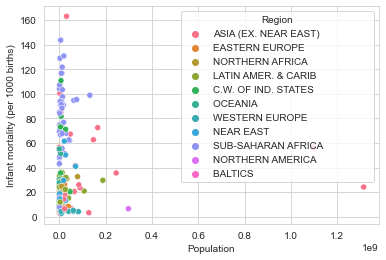

In [36]:
#China es un país singular debido a su población y podemos confirmar en este mismo grafico que no tiene una
# mortalidad infantil muy superior a las demas regiones. Mayor que los paises europeos pero menor que la mayoria
# de países subsaharianos y gran parte de los paises latinoamericanos.
sns.scatterplot(x='Population', y='Infant mortality (per 1000 births)', hue='Region',
               data = df)
plt.savefig('id_china_mortality.png')

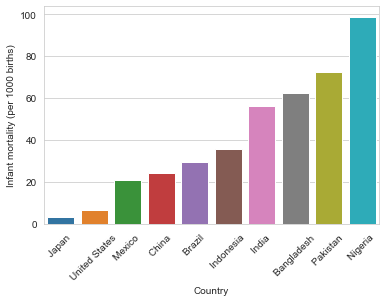

In [37]:
# Top ten population. Infant Mortality.
plt.figure()
sns.barplot(x='Country',
            y= china2.index,
            data=china2,
           )
plt.xticks(rotation = 45);

In [38]:
df['Coastline (coast/area ratio)'].sort_values(ascending=False)

136    870.66
157    331.66
127    214.67
22     194.34
122    146.43
        ...  
53       0.00
45       0.00
40       0.00
39       0.00
0        0.00
Name: Coastline (coast/area ratio), Length: 179, dtype: float64

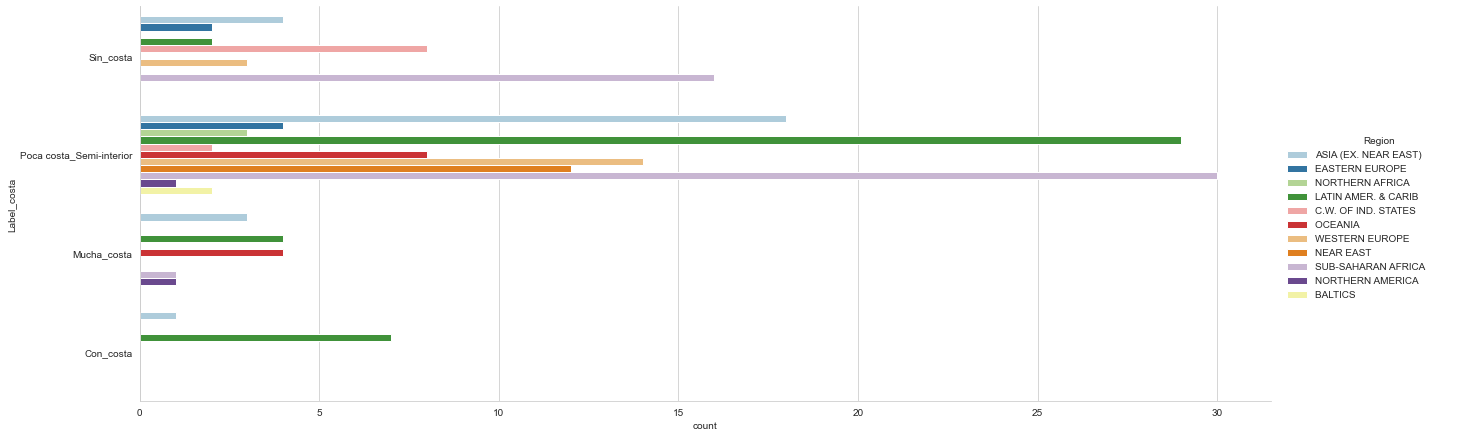

In [39]:
# Existe alguna diferencia entre países con costa y países en el interior? Por ejemplo, en media, 
# GDP o death rate

def etiquetador(fila):
    '''
    Estimación para clasificar los distintos paises segun su ratio de costa en 3 clases
    '''
    if fila == 0:
        return 'Sin_costa'
    if fila < 25:
        return 'Poca costa_Semi-interior'
    if fila > 25 and fila < 50 :
        return 'Con_costa'
   
    
    return 'Mucha_costa'
    
df['Label_costa'] = df['Coastline (coast/area ratio)'].apply(lambda x: etiquetador(x))

#Pinto un barplot que indique la cantidad de paises por clase de costa y por región.

sns.catplot(y='Label_costa',data=df,kind='count', hue= 'Region', orient='h', aspect=3,
           height = 6, palette = 'Paired' )
plt.savefig('typecoasts_region_numbercountries')
                                                                                                                                                   

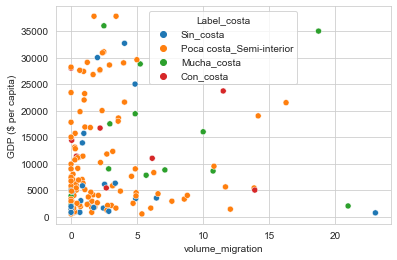

In [40]:
# Los paises con mucha costa tienen un mayor transito de población
df['volume_migration'] = df['Net migration'].apply(lambda x: np.sqrt(x**2))
sns.scatterplot(x=df['volume_migration'], y= df['GDP ($ per capita)'], hue=df['Label_costa'])
plt.savefig('volume_migration(both).png')


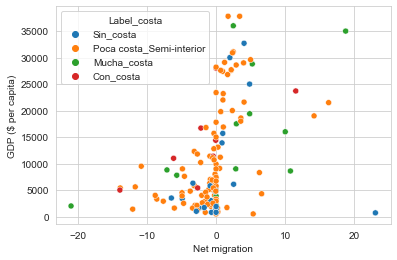

In [41]:
# Podemos apreciar que los paises con costa si tienen mas movimiento migratorio que los paises con poca costa o semi-
#interior y por otro lado vemos que existe un pais sin costa con mucho ratio de migración positiva y un pais con mucha
# costa que tiene un ratio de migración muy negativa.
# También podemos ver una mayor dispersión de los puntos en migración negativa en la parte baja del gráfico
# que es donde se encuentran los paises con una renta per capita mas baja.
sns.scatterplot(x=df['Net migration'], y= df['GDP ($ per capita)'], hue=df['Label_costa'])
plt.savefig('migrationByLabelcosta.png')

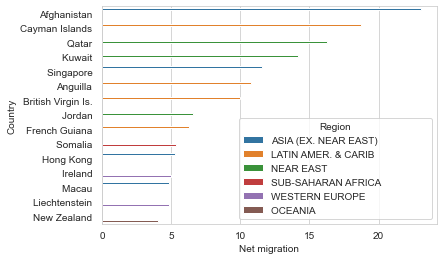

In [42]:
top_15_migration = df.nlargest(15,'Net migration')

sns.barplot(x=top_15_migration['Net migration'], y=top_15_migration['Country'], hue=top_15_migration['Region'])
plt.savefig('top_15_positivemigration.png')

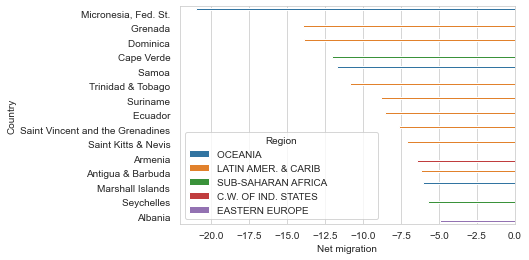

In [43]:
tail_15_migration = df.nsmallest(15,'Net migration')

sns.barplot(x=tail_15_migration['Net migration'], y=tail_15_migration['Country'], hue=tail_15_migration['Region'])
plt.savefig('top_15_negativemigration.png')


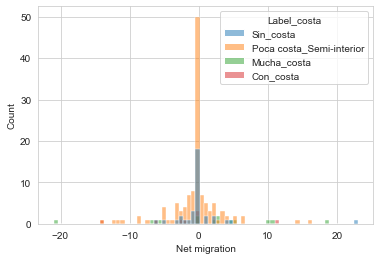

In [44]:
# Los paises con costa reciben mayor inmigración que los países sin costa?
sns.histplot(x='Net migration', hue='Label_costa', data=df)
plt.savefig('migrationByLabelcosta).png')

In [45]:
df.groupby('Region')[['Literacy (%)']].mean()

,Literacy (%)
Region,
ASIA (EX. NEAR EAST),81.680769
BALTICS,99.800000
C.W. OF IND. STATES,98.600000
EASTERN EUROPE,97.100000
LATIN AMER. & CARIB,90.328571
NEAR EAST,77.358333
NORTHERN AFRICA,67.300000
NORTHERN AMERICA,97.500000
OCEANIA,89.350000


In [46]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Label_costa',
       'volume_migration'],
      dtype='object')

In [81]:
#Intento sacar el ratio de suicidio en el año 2018 de la mayor cantidad de paises posible.

url2 = 'https://datosmacro.expansion.com/demografia/mortalidad/causas-muerte/suicidio?anio=2018'
page = requests.get(url2)
soup = BeautifulSoup(page.content, 'html.parser')

multiple_tr = soup.find_all("tr")
names = []
values = []
for element in multiple_tr:
    nameElement = element.find_all("a")
    valueElement = element.find_all("td", {"class": "numero"})
    for k in nameElement:
        names.append(k.text.replace("[+]",""))
    for j,h in enumerate(valueElement):
        if (j + 1) % 5 == 0:
            values.append(h.text.replace(',','.').replace('%',''))

mapa = list(zip(names,values))
#print(mapa)
jsonraw = []

for item,value in mapa:
    jsonraw.append({"name": item, "value": value})

import json

json_dump = json.dumps(jsonraw)
json_object = json.loads(json_dump)


data = pd.DataFrame.from_dict(json_object)

In [82]:
#Dataframe de distintos paises con su ratio de suicidio por 100 hab.
data

,name,value
0,España,11.31
1,Alemania,17.46
2,Reino Unido,12.53
3,Francia,20.41
4,Italia,9.67
...,...,...
179,Samoa,8.82
180,Yemen,10.75
181,Sudáfrica,1.40
182,Zambia,10.17


In [66]:
from google_trans_new import google_translator

In [67]:
translator = google_translator()

countries = [translator.translate(n) for n in data['name']]

In [83]:
data['Country'] = countries

In [84]:
suicide_df = pd.merge(left=df,right=data, left_on='Country', right_on='Country')
suicide_df.drop(columns=['name'], inplace=True)

In [92]:
suicide_df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
Label_costa                            object
volume_migration                  

In [91]:
suicide_df['value'] = suicide_df['value'].apply(lambda x: float(x))

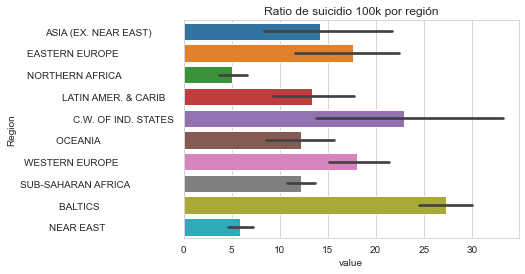

In [99]:
plt.figure()
sns.barplot(x='value', y='Region', data=suicide_df).set(title='Ratio de suicidio 100k por región');


In [131]:
value_corr = suicide_df[suicide_df.columns[1:]].corr()['value'][:]

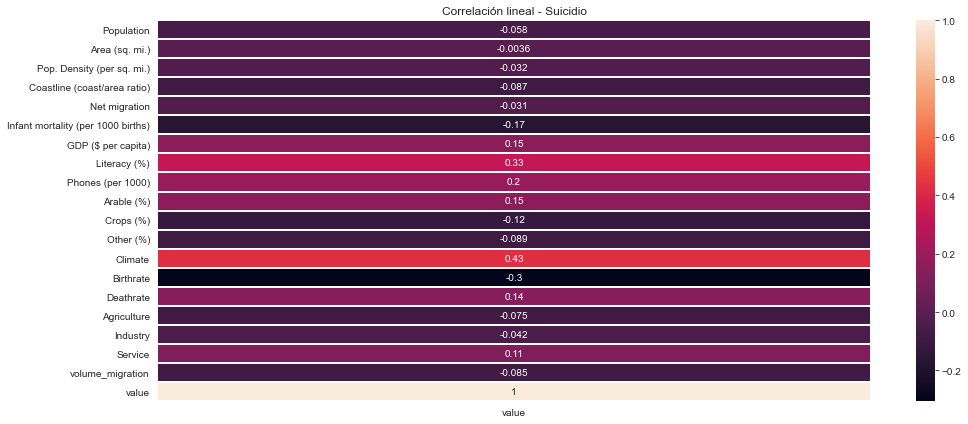

In [132]:
plt.figure(figsize = (16, 7))
value_corr = value_corr.to_frame()
sns.heatmap(value_corr, annot = True, fmt = '0.2g', linewidths = 1).set(title='Correlación lineal - Suicidio')
plt.show()